# Sup02-DEM, DTM, DSM and Canopy Height Model

When we talk about ***DEM***, we may often meet other two elevation models of digital terrain model (DTM) and digital surface model (DSM). 

- Digital Terrain Model (or ***DTM***): ground elevation.

- Digital Surface Model (or ***DSM***): top of the surface (imagine draping a sheet over the canopy of a forest

In most cases the term of DSM represents the earth's surface and includes all objects on it. In contrast to a DSM, the digital terrain model (DTM) represents the bare ground surface without any objects like plants and buildings. As we know, a digital elevation model (DEM) is a bare-earth raster grid referenced to a vertical datum. When you filter out non-ground points such as bridges and roads, you get a smooth digital elevation model. The built (power lines, buildings and towers) and natural (trees and other types of vegetation) aren’t included in a DEM. To this point, DTM is quite equivalent to DEM.

Generally, the elevation difference between DSM and DTM could be used to develop a Canopy Height Model (***CHM***). SpatialCover Canopy Height Model ([CHM](https://www.earthdefine.com/spatialcover_chm/)) is a high resolution (1 meter) raster dataset that maps the tree height as a continuous surface. Each pixel in the CHM represents the tree overstory height above the underlying ground topography. The key data source for creating a CHM is LIDAR data. LIDAR (Light Detection and Ranging) technology enables accurate measurement of elevation for different ground surface types based on the light pulses reflected from the earth. The following image presents the basic idea of CHM. ![CHM](img/lidarTree-height.png)Image source: Colin Williams, NEON

## Show time

I believe you already know how to deal with DEM data using xarray. Under such a case, it will be quite easy to create a Canopy Height Model. We only need read DTM (or DEM) and DSM data and make a simple mathematical subtraction.

In [1]:
%matplotlib inline

import numpy as np
import xarray as xr
import mapclassify as mc
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### Build a CHM

In [3]:
dtm_path = 'data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif'
dsm_path = 'data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DSM.tif'

da_dtm = xr.open_rasterio(dtm_path).drop('band')[0]
nodata = da_dtm.nodatavals[0]
da_dtm = da_dtm.where(da_dtm>nodata, np.nan)

da_dsm = xr.open_rasterio(dsm_path).drop('band')[0]
nodata = da_dsm.nodatavals[0]
da_dsm = da_dsm.where(da_dsm>nodata, np.nan)

da_chm = da_dsm - da_dtm

#### Visualize

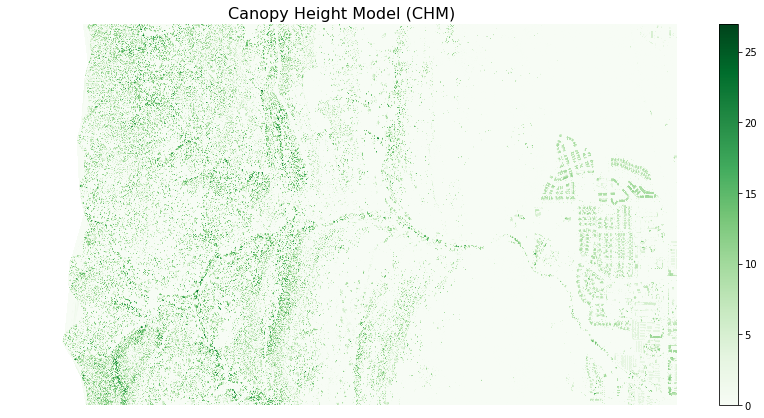

In [9]:
fig, ax = plt.subplots(figsize=(15, 7))
da_chm.plot(ax=ax, cmap='Greens')
ax.set_axis_off()
_= ax.set_title("Canopy Height Model (CHM)", fontsize=16)

Our CHM only presents the elevation difference between DSM and DTM and we are not sure what they are from (trees or house?). However, you can do more from this point. For example, you can reclassify the CHM data according to the heights of trees, etc.


## References

Joel Lawhead (2019). Learning Geospatial Analysis with Python - Third Edition.

Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006).

Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30 (2011), DOI:10.1109/MCSE.2011.37

Fernando Pérez and Brian E. Granger. IPython: A System for Interactive Scientific Computing, Computing in Science & Engineering, 9, 21-29 (2007), DOI:10.1109/MCSE.2007.53

John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55

https://rasterio.readthedocs.io/en/stable/

http://xarray.pydata.org/en/stable/

https://www.earthdefine.com/spatialcover_chm/

https://www.earthdatascience.org/courses/earth-analytics-python/lidar-raster-data/lidar-chm-dem-dsm/